In [139]:
import pandas as pd
import numpy as np
import sklearn

from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.feature_extraction import DictVectorizer

from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, ParameterGrid
from sklearn.model_selection import cross_validate, KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score

import matplotlib.pyplot as plt

In [341]:
data = pd.read_csv("aabmlogs.csv")
data = data.fillna(0)

In [295]:
sum(data['Rest']), len(data)

(6244.0, 37619)

In [117]:
# data = data[data['G'] > 10]
# data = data[data['MP'] >= 5]
# len(data), sum(data['Rest'])

36266

In [342]:
np.random.seed(42)
norest = data[data['Rest']==0]
samples = norest.sample(n=10000)

In [343]:
undersample = data.drop(samples.index)
data = undersample
sum(undersample['Rest']), len(undersample)

(6244.0, 27619)

In [344]:
train, val = train_test_split(data, test_size=.2, random_state=0)

In [356]:
train.head()

,G,Age,MP,FG,FGA,FG%,3P,3PA,3P%,FT,...,TRB,AST,STL,BLK,TOV,PTS,GmSc,+/-,score,Rest
24639,14.0,20.0,17.142857,2.285714,4.857143,0.470588,1.071429,2.571429,0.416667,0.785714,...,2.285714,1.142857,0.928571,0.071429,0.428571,6.428571,5.235714,4.642857,0.0,0.0
16725,25.0,23.0,29.500000,4.846154,9.846154,0.492188,1.307692,3.615385,0.361702,0.961538,...,5.115385,0.884615,1.000000,0.615385,1.230769,11.961538,8.976923,-0.538462,0.0,0.0
24901,25.0,25.0,19.566667,2.466667,4.633333,0.532374,0.333333,0.600000,0.555556,0.433333,...,2.900000,4.066667,0.900000,0.166667,1.666667,5.700000,5.990000,-1.166667,1.0,0.0
30571,24.0,22.0,30.807692,6.076923,12.269231,0.495298,2.076923,5.115385,0.406015,3.000000,...,7.653846,2.038462,0.961538,0.846154,1.423077,17.230769,14.403846,-1.923077,0.0,0.0
4157,41.0,29.0,19.261905,2.500000,4.642857,0.538462,0.285714,0.761905,0.375000,0.952381,...,4.500000,1.809524,0.571429,0.690476,0.833333,6.238095,6.254762,1.476190,1.0,0.0


In [345]:
feat = ['G', 'Age', 'MP', 'FGA', '3PA', 'FTA', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PTS', 'GmSc',
       '+/-', 'score']
pca_feat = ['G', 'MP', 'Age', '+/-', 'TRB', 'AST', 'score', '3PA', 'FGA']
X_train, y_train = train[feat], train[['Rest']]
X_val, y_val = val[feat], val[['Rest']]

In [346]:
X_train.columns, y_train.columns

(Index(['G', 'Age', 'MP', 'FGA', '3PA', 'FTA', 'TRB', 'AST', 'STL', 'BLK',
        'TOV', 'PTS', 'GmSc', '+/-', 'score'],
       dtype='object'), Index(['Rest'], dtype='object'))

In [331]:
len(X_train.columns), len(y_train.columns)

(15, 1)

## Decision Tree 

In [334]:
tree = DecisionTreeClassifier()
grid = {'max_depth': range(10, 50, 5),
              'min_samples_split' : range(2, 12, 2),
              'max_features' : range(4, 15, 2)}
cv = GridSearchCV(tree, param_grid=grid, scoring='recall', verbose=1, cv=3)
cv.fit(X=X_train, y=y_train)

Fitting 3 folds for each of 240 candidates, totalling 720 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed:  2.3min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': range(10, 50, 5),
                         'max_features': range(4, 15, 2),
                      

In [336]:
cv.best_score_, cv.best_params_

(0.6597883982762366,
 {'max_depth': 40, 'max_features': 14, 'min_samples_split': 2})

In [347]:
tree = DecisionTreeClassifier(max_depth=40, max_features=14, min_samples_split=2)
cross_validate(tree, X=X_train, y=y_train, cv=5, verbose=1, scoring='recall', return_train_score=True)['test_score'].mean()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.6s finished


0.706176408001135

In [348]:
tree = DecisionTreeClassifier(max_depth=40, max_features=8, min_samples_split=2)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=40,
                       max_features=8, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [349]:
pred = tree.predict(X_val)
accuracy_score(y_val, pred)

0.8727371469949312

In [350]:
recall_score(y_val, pred), precision_score(y_val, pred), f1_score(y_val, pred)

(0.7125103562551781, 0.7072368421052632, 0.7098638052001651)

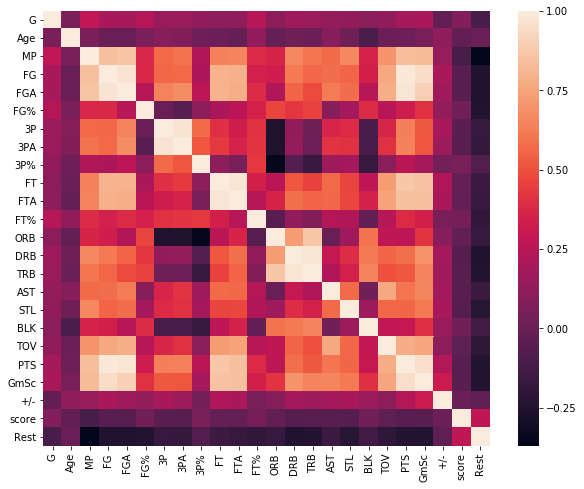

In [282]:
import seaborn as sns
%matplotlib inline

corr = data.corr()

# plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

## MLP Classifier

In [362]:
mlp = MLPClassifier()
mlp.fit(X_train, y_train)

/Users/benjaminlee/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [363]:
pred = mlp.predict(X_val)
accuracy_score(y_val, pred)

0.8513758146270818

In [364]:
recall_score(y_val, pred), precision_score(y_val, pred), f1_score(y_val, pred)

(0.4498757249378625, 0.7757142857142857, 0.5694808599895123)

## Logistic Regression 

In [359]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

/Users/benjaminlee/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/benjaminlee/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [360]:
pred = lr.predict(X_val)
accuracy_score(y_val, pred)

0.8240405503258509

In [361]:
recall_score(y_val, pred), precision_score(y_val, pred), f1_score(y_val, pred)

(0.37033968516984256, 0.6783004552352049, 0.4790996784565917)